In [9]:
import os

# Initialize an empty dictionary to store the data
TMscores = {}

# Get the current working directory
#cwd = os.getcwd()
#print(cwd)


#!!! Enter specifc path instead of cwd

cwd = "/nfs/home2/aidenkzj/natives/cleanup_pdbs/1aaj_cleanup_cp/foldseek_results"
#cwd = "/nfs/home2/aidenkzj/natives/cleanup_pdbs/1fzy_cleanup_cp/foldseek_results"
# Function to extract the numeric part from the filename
def extract_number(filename):
    return int(filename.split('_')[3])

# Get the list of filenames and sort them based on the numeric part
#files = os.listdir(cwd)
#print(files)
filenames = sorted([filename for filename in os.listdir(cwd) if filename.endswith(".m8")], key=extract_number)
#print(filenames)
# Loop over each file in the sorted list
for filename in filenames:
    # Extract the filename without path or file extension
    file_basename = os.path.splitext(os.path.basename(filename))[0]
    
    # Open the file in read mode
    with open(os.path.join(cwd, filename), 'r') as file:
        # Read the first line
        first_line = file.readline().strip()  # Remove any leading/trailing whitespace
        
        # Split the first line by whitespace
        parts = first_line.split()
        #print(parts)
        # Extract the 14th element from the parts list
            # Extract the 14th element from the parts list
        if not parts:
           TMscore = 0
        else:
           TMscore = parts[14]
        
        # Add the element to the dictionary with the filename as the key
        TMscores[file_basename] = TMscore

# Display the dictionary
#print("Dictionary containing 14th element from each file:")
#print(TMscores)


**Plot the TMscores**

['8.103E-01', '7.980E-01', '7.857E-01', '7.739E-01', '7.619E-01', '7.502E-01', '7.398E-01', '7.277E-01', '7.175E-01', '7.058E-01', '7.167E-01', '7.167E-01', '7.167E-01', '7.144E-01', '7.018E-01', '6.905E-01', '6.783E-01', '6.665E-01', '6.547E-01', '6.432E-01', '4.693E-01', '5.329E-01', '4.779E-01', '4.922E-01', '7.271E-01', '7.346E-01', '7.323E-01', '7.253E-01', '7.213E-01', '5.567E-01', '5.517E-01', 0, '8.520E-01', '8.771E-01', '8.731E-01', '8.866E-01', '8.889E-01', '8.896E-01', '8.915E-01', '8.903E-01', '8.959E-01', '8.797E-01', '8.699E-01', '8.713E-01', '8.476E-01', '8.361E-01', '8.257E-01', '8.178E-01', '8.072E-01', '7.984E-01', '6.325E-01', '7.807E-01', '5.891E-01', '6.325E-01', '6.325E-01', '5.907E-01', '6.987E-01', '6.007E-01', '5.978E-01', '7.044E-01', '5.830E-01', '5.982E-01', '6.283E-01', '6.283E-01', '6.274E-01', '7.356E-01', '7.483E-01', '7.610E-01', '7.737E-01', '7.865E-01', '7.993E-01', '8.121E-01', '8.247E-01', '8.371E-01', '8.496E-01', '8.621E-01', '8.051E-01', '8.178E-

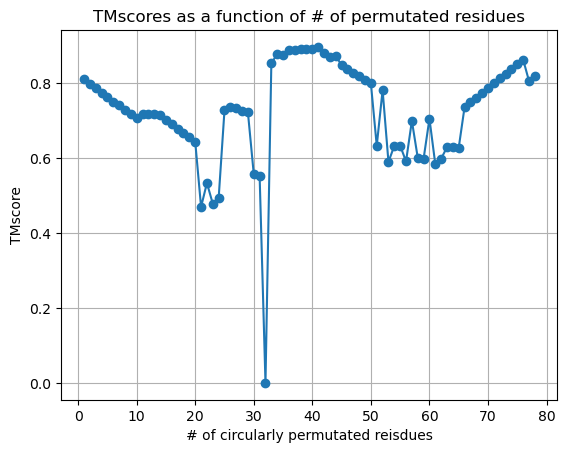

In [10]:
import matplotlib.pyplot as plt

# Extract the values from the dictionary
values = list(TMscores.values())
print(values)
float_values = list(map(float, values))

# Plot the values
plt.plot(range(1, len(values) + 1), float_values, marker='o')  # X-axis starts from 1
plt.xlabel('# of circularly permutated reisdues')
plt.ylabel('TMscore')
plt.title('TMscores as a function of # of permutated residues')
plt.grid(True)
plt.show()